# Carry out an exploratory analysis to glean out insights and trends in the dataset.

## Find a means to relate it with external data to help understand user behaviour. Try to notice trends in what triggers transactions at certain times of the year, what could be the possible cause of increased failed transactions… etc.

## Make a mini presentation with the use of the jupyter slides extension and hide the input cells of the selected pages of the slide.

In [2]:
# import dependencies

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt 

### See imported data below. It is name 'transData'

In [141]:
# import necessary data

transData = pd.read_csv("txn_data.csv", index_col='Unnamed: 0')
transData

,acct_no,txnYear,txnMonth,txnDay,status,no of txns
0,1001192k,2019,10,29,successful,1
1,1001192k,2019,11,12,failed,2
2,1001192k,2019,11,18,failed,1
3,1001192k,2019,11,27,successful,1
4,1001192k,2019,12,8,failed,1
...,...,...,...,...,...,...
513242,9999437n,2020,10,15,successful,2
513243,9999437n,2020,10,16,successful,1
513244,9999437n,2020,10,21,successful,2
513245,9999437n,2020,10,23,successful,2


### A time series was derived from the imported data above

In [4]:
# derive a timeseries from given data

transData['txnYear'], transData['txnMonth'], transData['txnDay'] = transData['txnYear'].astype(str), transData['txnMonth'].astype(str), transData['txnDay'].astype(str)
transData['date'] = transData['txnYear'] + transData['txnMonth'] + transData['txnDay']
transData['date'] = transData['date'].apply(lambda x:dt.datetime.strptime(x, '%Y%m%d'))
transData['year_month'] = transData['txnYear'] + '-' + transData['txnMonth']
transData

,acct_no,txnYear,txnMonth,txnDay,status,no of txns,date,year_month
0,1001192k,2019,10,29,successful,1,2019-10-29,2019-10
1,1001192k,2019,11,12,failed,2,2019-11-12,2019-11
2,1001192k,2019,11,18,failed,1,2019-11-18,2019-11
3,1001192k,2019,11,27,successful,1,2019-11-27,2019-11
4,1001192k,2019,12,8,failed,1,2019-12-08,2019-12
...,...,...,...,...,...,...,...,...
513242,9999437n,2020,10,15,successful,2,2020-10-15,2020-10
513243,9999437n,2020,10,16,successful,1,2020-10-16,2020-10
513244,9999437n,2020,10,21,successful,2,2020-10-21,2020-10
513245,9999437n,2020,10,23,successful,2,2020-10-23,2020-10


### Data was then sorted by dates after which date was used as the index

In [5]:
transData = transData.sort_values(by='date', ascending = True)
transData = transData.set_index(transData['date'].values)

transData

,acct_no,txnYear,txnMonth,txnDay,status,no of txns,date,year_month
2019-05-21,1718601l,2019,5,21,successful,3,2019-05-21,2019-5
2019-05-21,6013170r,2019,5,21,successful,1,2019-05-21,2019-5
2019-05-21,3800682k,2019,5,21,successful,1,2019-05-21,2019-5
2019-05-21,7988606p,2019,5,21,successful,2,2019-05-21,2019-5
2019-05-21,6485922j,2019,5,21,successful,4,2019-05-21,2019-5
...,...,...,...,...,...,...,...,...
2020-12-09,9985393s,2020,1,29,successful,2,2020-12-09,2020-1
2020-12-09,6038095m,2020,1,29,successful,3,2020-12-09,2020-1
2020-12-09,6033179m,2020,1,29,successful,1,2020-12-09,2020-1
2020-12-09,6030222l,2020,1,29,successful,1,2020-12-09,2020-1


In [6]:
transData = transData.drop('date', axis=1)

In [7]:
transData = transData.rename(columns={'no of txns':'txnCount'})

### Some basic info about the transaction data

In [8]:
print(f'There are {transData["acct_no"].nunique()} unique users over the period')

There are 8040 unique users over the period


#### There are 8040 unique users over the period

In [84]:
print(f'{transData["txnCount"].sum()} transactions were consumated from {transData.index[0].strftime("%Y %B %d")} to {transData.index[-1].strftime("%Y %B %d")}')

1237429 transactions were consumated from 2019 May 21 to 2020 December 09


#### 1237429 transactions were consumated from 2019 May 21 to 2020 December 09

In [10]:
transData["yr_mth"] = transData.index.strftime('%Y-%m')

In [11]:
transData = transData.drop('year_month', axis=1)
transData = transData.rename(columns={'yr_mth':'year_month'})
transData

,acct_no,txnYear,txnMonth,txnDay,status,txnCount,year_month
2019-05-21,1718601l,2019,5,21,successful,3,2019-05
2019-05-21,6013170r,2019,5,21,successful,1,2019-05
2019-05-21,3800682k,2019,5,21,successful,1,2019-05
2019-05-21,7988606p,2019,5,21,successful,2,2019-05
2019-05-21,6485922j,2019,5,21,successful,4,2019-05
...,...,...,...,...,...,...,...
2020-12-09,9985393s,2020,1,29,successful,2,2020-12
2020-12-09,6038095m,2020,1,29,successful,3,2020-12
2020-12-09,6033179m,2020,1,29,successful,1,2020-12
2020-12-09,6030222l,2020,1,29,successful,1,2020-12


In [12]:
transMetric = transData.groupby('year_month')['txnCount'].sum()

In [15]:
print(f'The average monthly transaction count is {transMetric.mean()}')

The average monthly transaction count is 61871.45


#### The average monthly transaction count is 61871.45

In [17]:
transMetric

year_month
2019-05     10297
2019-06     32338
2019-07     40347
2019-08     46421
2019-09     39670
2019-10     48327
2019-11     47065
2019-12     37280
2020-01     12789
2020-02     46043
2020-03     51950
2020-04     47632
2020-05     67864
2020-06     64521
2020-07     83585
2020-08     59166
2020-09    200178
2020-10    240997
2020-11     48447
2020-12     12512
Name: txnCount, dtype: int64

In [21]:
txnCount_perMonth = pd.DataFrame(transMetric)

### Transaction count per month

In [22]:
txnCount_perMonth

,txnCount
year_month,
2019-05,10297
2019-06,32338
2019-07,40347
2019-08,46421
2019-09,39670
2019-10,48327
2019-11,47065
2019-12,37280
2020-01,12789


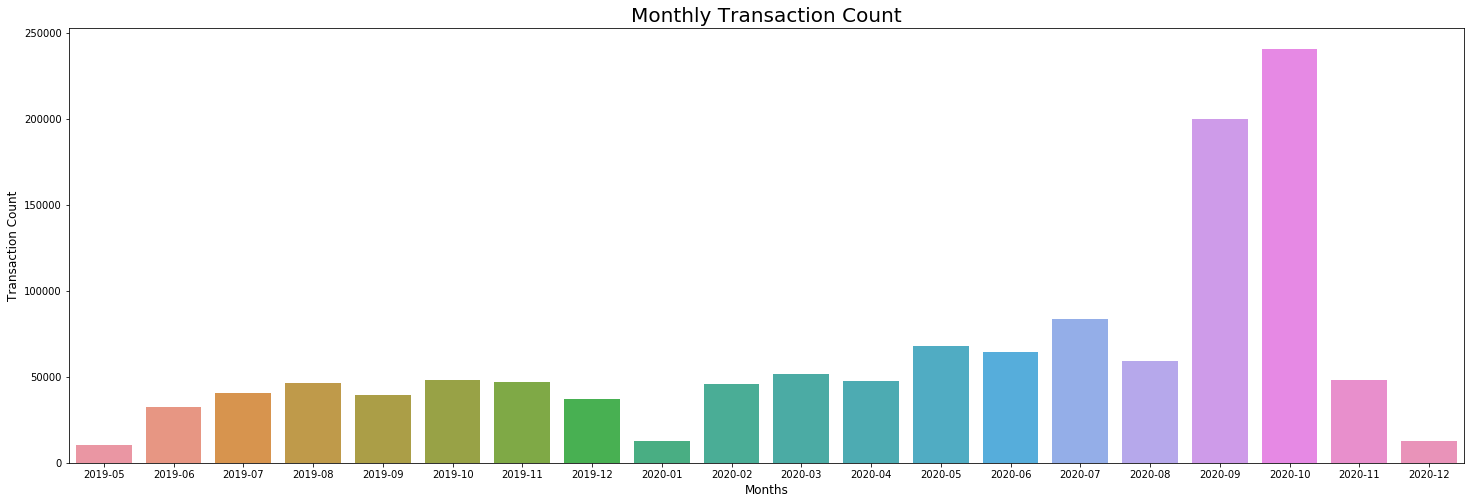

In [35]:
plt.figure(figsize=(25,8))
plt.title('Monthly Transaction Count', fontsize = 20)
ax = sns.barplot(x=txnCount_perMonth.index, y=txnCount_perMonth['txnCount'], data = txnCount_perMonth)
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
plt.show()

### In September and October, the transaction count is on the high. This is attributed to the EndSars Protest which occurred in that same period.

In [37]:
userMetric = transData.groupby('acct_no')['txnCount'].sum()
txnCount_perUser = pd.DataFrame(userMetric)
txnCount_perUser = txnCount_perUser.sort_values(by='txnCount', ascending = False)

### Top Users

In [41]:
topUsers = txnCount_perUser.head()
topUsers

,txnCount
acct_no,
4203382q,109155
5843310m,13957
8056313r,13164
9850157q,7243
2029125q,5749


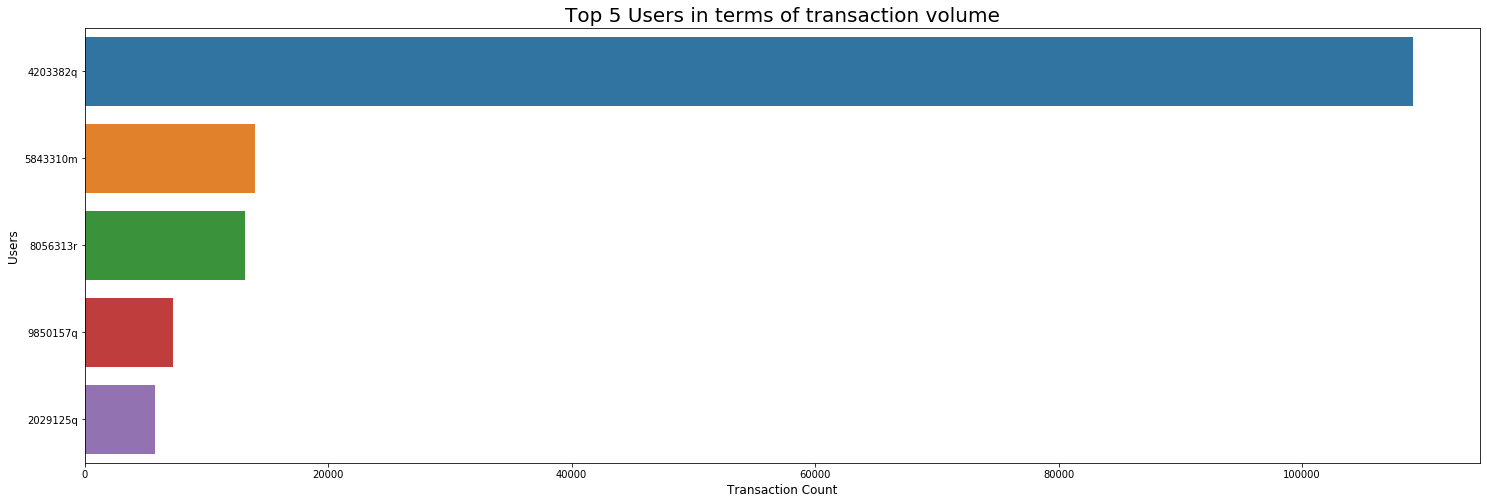

In [45]:
plt.figure(figsize=(25,8))
plt.title('Top 5 Users in terms of transaction volume', fontsize = 20)
ax = sns.barplot(x=topUsers['txnCount'], y=topUsers.index, data = topUsers)
ax.set_xlabel('Transaction Count', fontsize=12)
ax.set_ylabel('Users', fontsize=12)
plt.show()

#### User 4203382q is the top user over ther whole period

### Top Users with Successful Transactions

In [52]:
userMetric_SuccTrans = transData[transData['status']=='successful'].groupby('acct_no').sum()
SucctxnCount_perUser = pd.DataFrame(userMetric_SuccTrans)
SucctxnCount_perUser = SucctxnCount_perUser.sort_values(by='txnCount', ascending = False)
topSuccUsers = SucctxnCount_perUser.head()
topSuccUsers

,txnCount
acct_no,
4203382q,102082
5843310m,13166
8056313r,12142
9850157q,6680
4495282m,4279


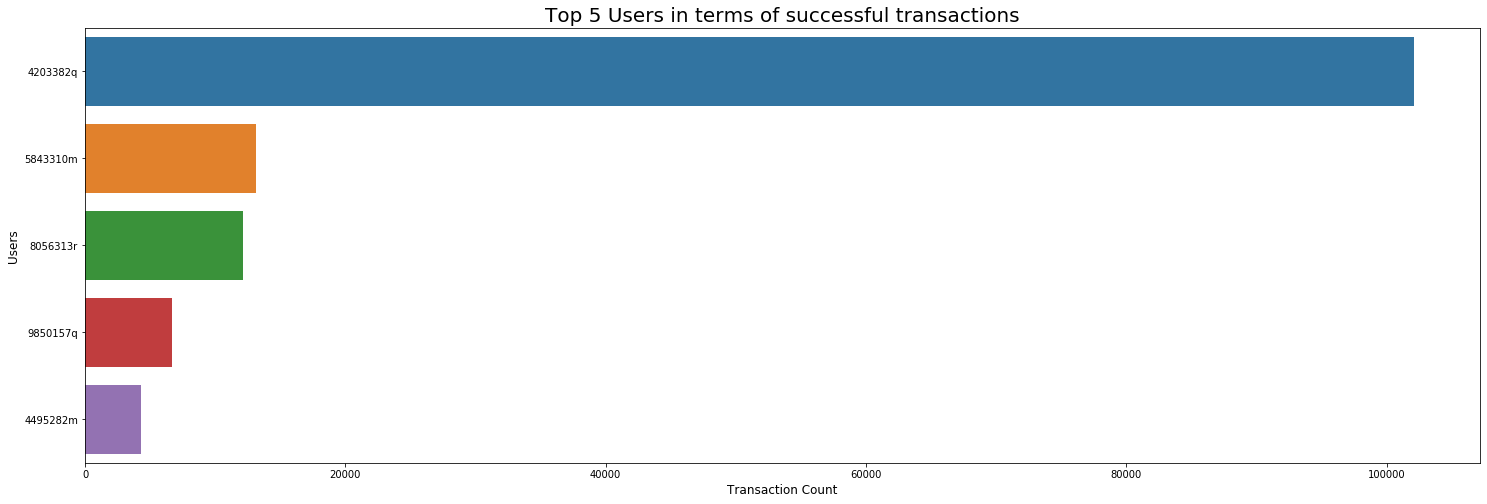

In [53]:
plt.figure(figsize=(25,8))
plt.title('Top 5 Users in terms of successful transactions', fontsize = 20)
ax = sns.barplot(x=topSuccUsers['txnCount'], y=topSuccUsers.index, data = topSuccUsers)
ax.set_xlabel('Transaction Count', fontsize=12)
ax.set_ylabel('Users', fontsize=12)
plt.show()

#### User 4203382q also had the most successful transactions

In [54]:
transData

,acct_no,txnYear,txnMonth,txnDay,status,txnCount,year_month
2019-05-21,1718601l,2019,5,21,successful,3,2019-05
2019-05-21,6013170r,2019,5,21,successful,1,2019-05
2019-05-21,3800682k,2019,5,21,successful,1,2019-05
2019-05-21,7988606p,2019,5,21,successful,2,2019-05
2019-05-21,6485922j,2019,5,21,successful,4,2019-05
...,...,...,...,...,...,...,...
2020-12-09,9985393s,2020,1,29,successful,2,2020-12
2020-12-09,6038095m,2020,1,29,successful,3,2020-12
2020-12-09,6033179m,2020,1,29,successful,1,2020-12
2020-12-09,6030222l,2020,1,29,successful,1,2020-12


## Transaction Count by Status

In [81]:
statusData = transData.drop(['txnYear','txnMonth','txnDay','year_month'], axis='columns')
statusData = statusData.groupby('status').sum()
statusData = statusData.sort_values(by='txnCount', ascending = False)
statusData
# SucctxnCount_perUser = pd.DataFrame(userMetric_SuccTrans)
# SucctxnCount_perUser = SucctxnCount_perUser.sort_values(by='txnCount', ascending = False)
# topSuccUsers = SucctxnCount_perUser.head()
# topSuccUsers

,txnCount
status,
successful,1176531
failed,46239
declined,13091
initialized,1466
pending,65
debited,37


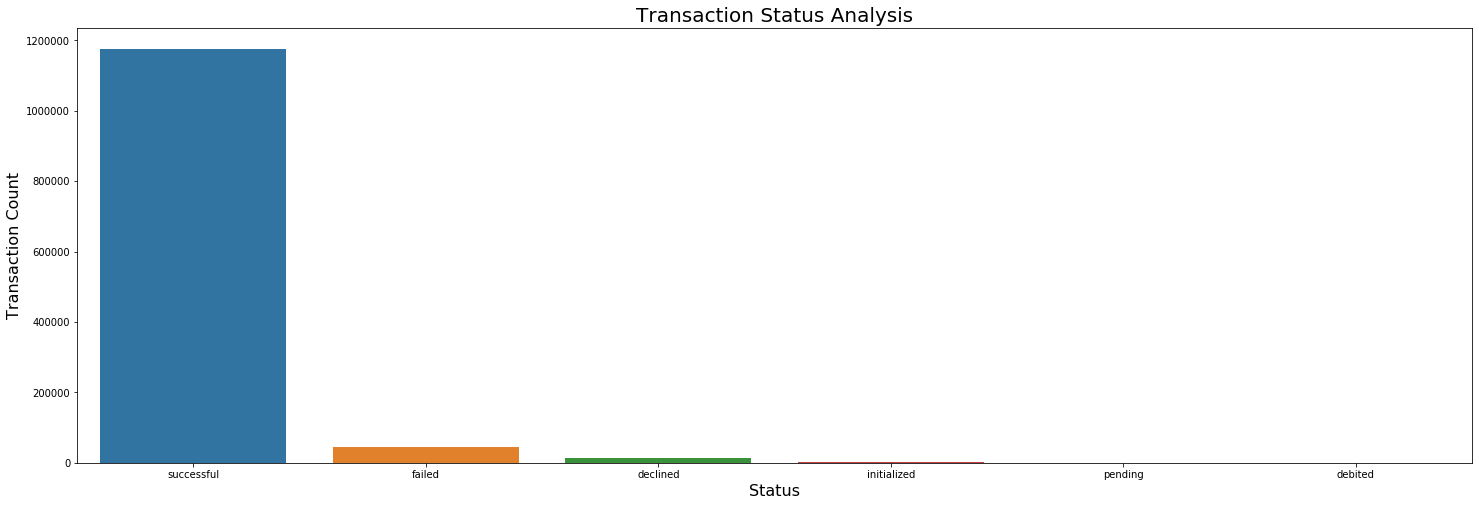

In [83]:
plt.figure(figsize=(25,8))
plt.title('Transaction Status Analysis', fontsize = 20)
ax = sns.barplot(x=statusData.index, y=statusData['txnCount'], data = statusData)
ax.set_xlabel('Status', fontsize=16)
ax.set_ylabel('Transaction Count', fontsize=16)
plt.show()

#### 95% of all transactions carried out over the period were successful

# END SARS PERIOD

### These were transactions that happened in September 2020 and October 2020

In [86]:
transData['Date'] = transData.index
endSARS_period = transData.set_index('year_month').loc['2020-09':'2020-10']
endSARS_period

,acct_no,txnYear,txnMonth,txnDay,status,txnCount,Date
year_month,,,,,,,
2020-09,8334711r,2020,9,1,successful,1,2020-09-01
2020-09,6382078m,2020,9,1,successful,14,2020-09-01
2020-09,9980365k,2020,9,1,failed,3,2020-09-01
2020-09,5975512m,2020,9,1,successful,6,2020-09-01
2020-09,2946418k,2020,9,1,successful,1,2020-09-01
...,...,...,...,...,...,...,...
2020-10,3827748m,2020,10,31,successful,4,2020-10-31
2020-10,1661396q,2020,10,31,successful,1,2020-10-31
2020-10,1843337o,2020,10,31,successful,2,2020-10-31


In [87]:
print(f'There are {endSARS_period["acct_no"].nunique()} unique users during the End Sars period')

There are 5861 unique users during the End Sars period


#### There are 5861 unique users during the End Sars period

In [97]:
print(f'{endSARS_period["txnCount"].sum()} transactions were consumated during the End Sars Period which is way higher than the average monthly transaction volume which is {transMetric.mean()}')

441175 transactions were consumated during the End Sars Period which is way higher than the average monthly transaction volume which is 61871.45


#### 441175 transactions were consumated during the End Sars Period which is way higher than the average monthly transaction volume which is 61871.45

### Top Users during the EndSARS period

In [116]:
userMetric_ES = endSARS_period.groupby('acct_no')['txnCount'].sum()
txnCount_perUser_ES = pd.DataFrame(userMetric_ES)
txnCount_perUser_ES = txnCount_perUser_ES.sort_values(by='txnCount', ascending = False)

In [117]:
topUsers_ES = txnCount_perUser_ES.head()
topUsers_ES

,txnCount
acct_no,
4203382q,19408
9850157q,6039
5843310m,3652
7502779o,3515
2029125q,2586


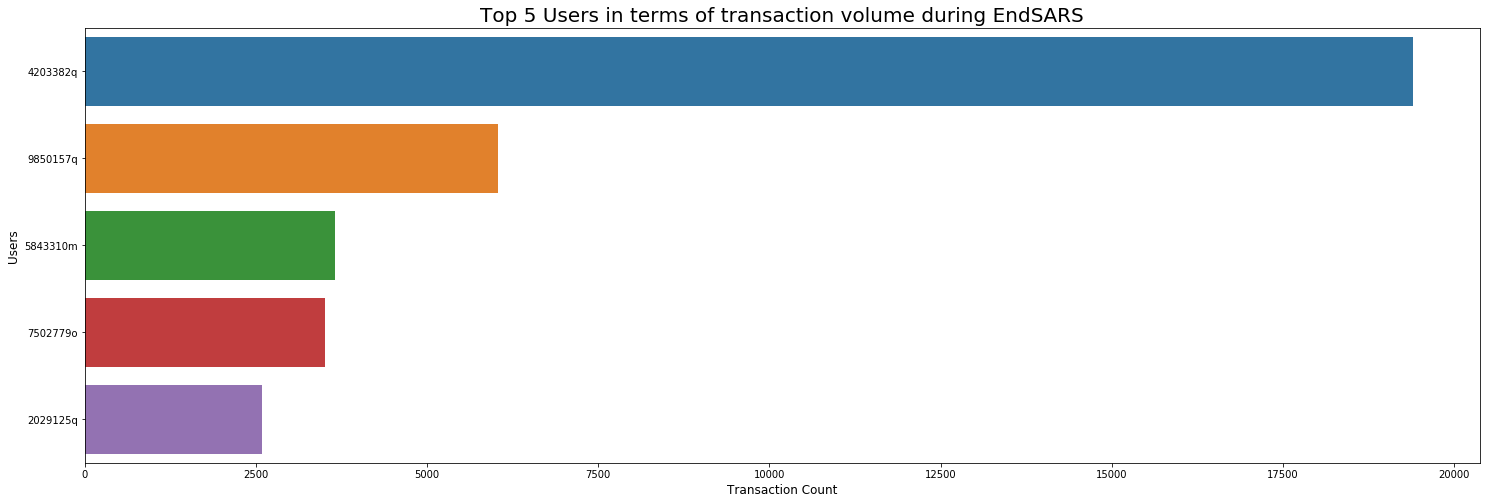

In [118]:
plt.figure(figsize=(25,8))
plt.title('Top 5 Users in terms of transaction volume during EndSARS', fontsize = 20)
ax = sns.barplot(x=topUsers_ES['txnCount'], y=topUsers_ES.index, data = topUsers_ES)
ax.set_xlabel('Transaction Count', fontsize=12)
ax.set_ylabel('Users', fontsize=12)
plt.show()

#### User 4203382q is also the top user during the EndSARS period

## Transaction Count by Status during EndSARS

In [122]:
statusData_ES = endSARS_period.drop(['txnYear','txnMonth','txnDay'], axis='columns')
statusData_ES = statusData_ES.groupby('status').sum()
statusData_ES = statusData_ES.sort_values(by='txnCount', ascending = False)
statusData_ES
#endSARS_period

,txnCount
status,
successful,424312
failed,10900
declined,5567
initialized,375
pending,20
debited,1


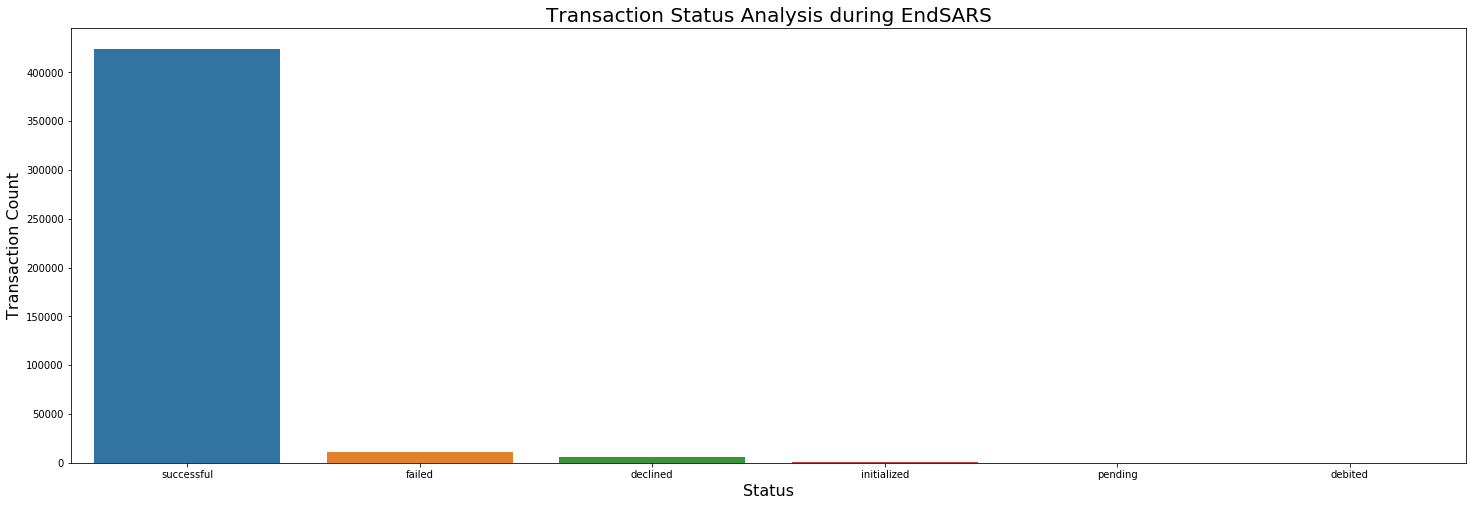

In [123]:
plt.figure(figsize=(25,8))
plt.title('Transaction Status Analysis during EndSARS', fontsize = 20)
ax = sns.barplot(x=statusData_ES.index, y=statusData_ES['txnCount'], data = statusData_ES)
ax.set_xlabel('Status', fontsize=16)
ax.set_ylabel('Transaction Count', fontsize=16)
plt.show()

### Weekday Analysis

In [126]:
transData['txnWeekDay'] = pd.DatetimeIndex(transData.Date).weekday
newData = transData.drop(['txnYear','txnMonth','txnDay','txnWeek'], axis='columns')
newData['txnMonth'] = pd.DatetimeIndex(newData.Date).month
newData['txnYear'] = pd.DatetimeIndex(newData.Date).year
newData['txnDay'] = pd.DatetimeIndex(newData.Date).day
newData

,acct_no,status,txnCount,year_month,Date,txnWeekDay,txnMonth,txnYear,txnDay
2019-05-21,1718601l,successful,3,2019-05,2019-05-21,1,5,2019,21
2019-05-21,6013170r,successful,1,2019-05,2019-05-21,1,5,2019,21
2019-05-21,3800682k,successful,1,2019-05,2019-05-21,1,5,2019,21
2019-05-21,7988606p,successful,2,2019-05,2019-05-21,1,5,2019,21
2019-05-21,6485922j,successful,4,2019-05,2019-05-21,1,5,2019,21
...,...,...,...,...,...,...,...,...,...
2020-12-09,9985393s,successful,2,2020-12,2020-12-09,2,12,2020,9
2020-12-09,6038095m,successful,3,2020-12,2020-12-09,2,12,2020,9
2020-12-09,6033179m,successful,1,2020-12,2020-12-09,2,12,2020,9
2020-12-09,6030222l,successful,1,2020-12,2020-12-09,2,12,2020,9


In [131]:
weeklyTrans = newData.reset_index()
weeklyTrans = weeklyTrans.drop(['txnYear','txnMonth','txnDay','acct_no','index','year_month','Date'], axis='columns')
weekDayTrans = weeklyTrans
weekDayTrans

,status,txnCount,txnWeekDay
0,successful,3,1
1,successful,1,1
2,successful,1,1
3,successful,2,1
4,successful,4,1
...,...,...,...
513242,successful,2,2
513243,successful,3,2
513244,successful,1,2
513245,successful,1,2


### Created a Pivot from the data

In [138]:
weekDayTrans_pivot = pd.pivot_table(weekDayTrans, index=['txnWeekDay'], columns=['status'], values=['txnCount'], aggfunc='sum')
weekDayTrans_pivot

txnCount                                                
status      debited declined  failed initialized pending successful
txnWeekDay                                                         
0               3.0   2238.0  9165.0       358.0    37.0   192282.0
1              21.0   1615.0  7547.0       274.0    13.0   183509.0
2               9.0   2212.0  7193.0       257.0     7.0   181347.0
3               NaN   2011.0  6325.0       270.0     7.0   183404.0
4               3.0   1715.0  5488.0       152.0     NaN   172687.0
5               1.0   1723.0  6224.0       117.0     1.0   171743.0
6               NaN   1577.0  4297.0        38.0     NaN    91559.0

#### Compared to other weekdays, Weekday 6 has a lesser number of successful transactions

#### Generally, transactions are lower on weekday 6

In [140]:
ax3 = weekDayTrans_pivot.plot(xticks=weekDayTrans_pivot.index, figsize(16,8))
ylab = ax3.set_ylabel('txnCount')

SyntaxError: positional argument follows keyword argument (<ipython-input-140-43e50148bbf7>, line 1)

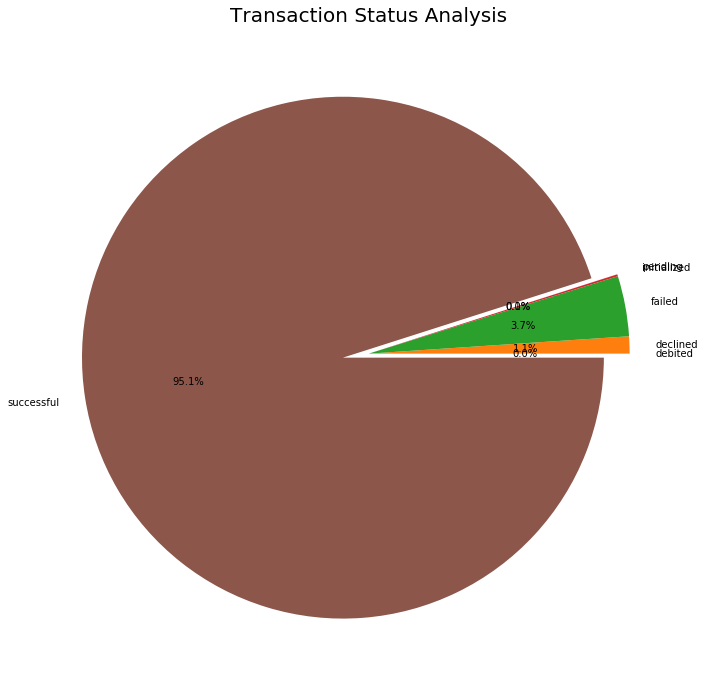

In [79]:
pie, ax2 = plt.subplots(figsize=[20,12])
labels = statusData.index
explode = (0,0,0,0,0,0.1)
plt.title('Transaction Status Analysis', fontsize = 20)
plt.pie(x=statusData['txnCount'], autopct="%.1f%%", labels=labels, explode=explode)
# ax = sns.barplot(x=topSuccUsers['txnCount'], y=topSuccUsers.index, data = topSuccUsers)
# ax.set_xlabel('Transaction Count', fontsize=12)
# ax.set_ylabel('Users', fontsize=12)
plt.show()